# Week 04 Lab Exercises: Visualisation of Multivariate Dataset

This week's exercises will focus on applying appropriate visualisation techniques to help with the analysis of multivariate dataset.

Before you approach the tasks below, you should walk through the visualisation examples notebook in __week04-examples-visualisation.ipynb__.

Please note: the instruction for this week's exercises is less prescriptive than previous exercises.
The intention is to encourage you to apply the visualisation techniques introduced in the lecture to help formulate a qualitative answer to the question posed to you.

In [1]:
#This is ipython magic command which specifies how a matplotlib plot will be displayed in the notebook.
%matplotlib notebook
#pandas untilites and methods are from the pandas package
import pandas as pd
import numpy as np
import random
import math

#import pyplot from matplotlib for data visualisation
from matplotlib import pyplot as plt
#import Axes3D for some of the 3D visualisation
from mpl_toolkits.mplot3d import Axes3D

## Task 1: Visual exploration of adult dataset

In this task, you will be instructed to use specific visualisation techniques to explore the relationship between attribute pairs in the adult dataset.

In [2]:
#import data from a csv file
adult_data = pd.read_csv(r'C:\Users\Waqas\bdadata\adult\adult_full.data')
#print 3 random entries from the imported data for visual inspection
adult_data.sample(3)

,age,workclass,fnlwgt,education,education-num,Marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
28522,42,Private,204235,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
13800,40,Private,162098,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,30,United-States,<=50K
37173,29,Private,359155,HS-grad,9,Separated,Transport-moving,Unmarried,White,Female,0,0,30,United-States,<=50K


### 1a. Pair-wise relationship using cross tabulation, heatmap and 3D bar chart

Use cross tabulation, heatmap and 3D bar chart to show the relationship between occupation and education

__Question:__ What are the most likely occupation for people with at least a Bachlor's degree?

__Answer:__ Prof-specialty

In [3]:
#write the python script for cross tabulation here
#narrow down and store the entries of adult_data according to the specified criteria
criteria = adult_data[((adult_data['education'] == " Bachelors") |
                          (adult_data['education'] == " Prof-school") |
                          (adult_data['education'] == " Masters") |
                          (adult_data['education'] == " Doctorate"))]

#create a cross tabulation based on education and occupation within the criteria
#normalise and display margins within the cross tabulation
pd.crosstab(criteria.education, criteria.occupation, normalize=True, margins=True)

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,All
education,,,,,,,,,,,,,,,,
Bachelors,0.020892,0.063171,0.000083,0.027415,0.167217,0.009331,0.006524,0.008175,0.021387,0.000991,0.184393,0.012139,0.104707,0.028571,0.007680,0.662675
Doctorate,0.001486,0.000495,0.000000,0.000330,0.006936,0.000083,0.000000,0.000083,0.000165,0.000083,0.037159,0.000083,0.001321,0.000661,0.000165,0.049050
Masters,0.005533,0.008671,0.000165,0.002808,0.064327,0.001156,0.000413,0.000991,0.002890,0.000083,0.107514,0.001652,0.017011,0.005037,0.001156,0.219405
Prof-school,0.001982,0.000991,0.000083,0.000743,0.005698,0.000578,0.000000,0.000083,0.000578,0.000000,0.055078,0.000083,0.001899,0.000826,0.000248,0.068869
All,0.029893,0.073328,0.000330,0.031296,0.244178,0.011148,0.006936,0.009331,0.025021,0.001156,0.384145,0.013955,0.124938,0.035095,0.009249,1.000000


<IPython.core.display.Javascript object>


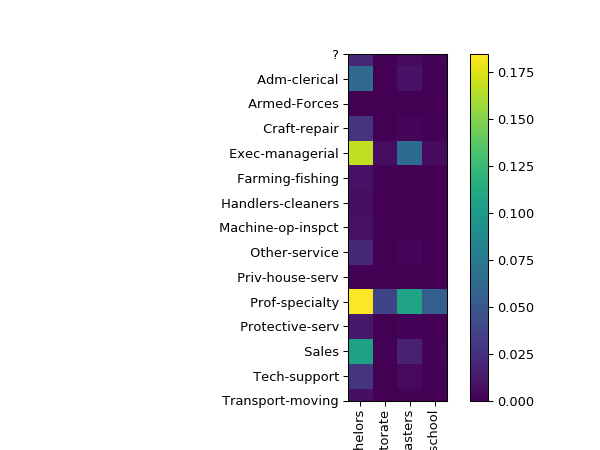

[Text(0, 0, ' ?'),
 Text(0, 0, ' Adm-clerical'),
 Text(0, 0, ' Armed-Forces'),
 Text(0, 0, ' Craft-repair'),
 Text(0, 0, ' Exec-managerial'),
 Text(0, 0, ' Farming-fishing'),
 Text(0, 0, ' Handlers-cleaners'),
 Text(0, 0, ' Machine-op-inspct'),
 Text(0, 0, ' Other-service'),
 Text(0, 0, ' Priv-house-serv'),
 Text(0, 0, ' Prof-specialty'),
 Text(0, 0, ' Protective-serv'),
 Text(0, 0, ' Sales'),
 Text(0, 0, ' Tech-support'),
 Text(0, 0, ' Transport-moving')]

In [4]:
#write the python script for heatmap here
#narrow down and store the entries of adult_data according to the specified criteria
criteria = adult_data[((adult_data['education'] == " Bachelors") |
                          (adult_data['education'] == " Prof-school") |
                          (adult_data['education'] == " Masters") |
                          (adult_data['education'] == " Doctorate"))]

#store the cross tabulation within a dataframe
ctab = pd.crosstab(criteria.occupation, criteria.education, normalize=True)
#convert the pandas dataframe to a numpy array
image = ctab.to_numpy()

#use matplotlib to create a figure
fig = plt.figure()
#add a 1x1x1 subplot to the figure
axis = fig.add_subplot(111)
#plot the numpy array on the axis of the plot
image = axis.imshow(image)
#show the colour bar
fig.colorbar(image)

#add labels to the axes
col_labels = ctab.columns.to_list()
row_labels = ctab.index.values

#set the ticks of each axis equal the row and col lables
axis.set_xticks(range(len(col_labels)))
axis.set_yticks(range(len(row_labels)))
axis.set_xticklabels(col_labels, rotation='vertical')
axis.set_yticklabels(row_labels)

<IPython.core.display.Javascript object>


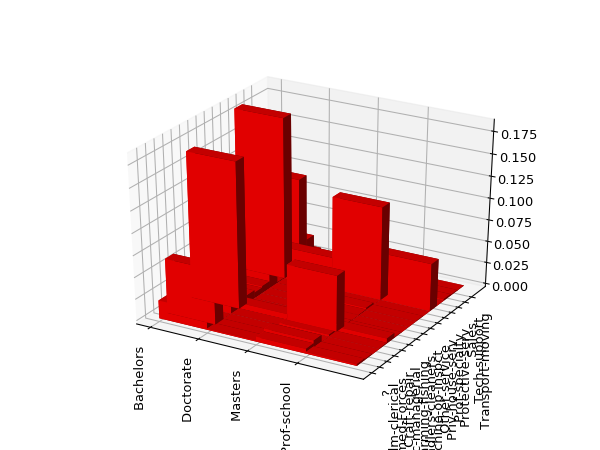

[Text(0, 0, ' ?'),
 Text(0, 0, ' Adm-clerical'),
 Text(0, 0, ' Armed-Forces'),
 Text(0, 0, ' Craft-repair'),
 Text(0, 0, ' Exec-managerial'),
 Text(0, 0, ' Farming-fishing'),
 Text(0, 0, ' Handlers-cleaners'),
 Text(0, 0, ' Machine-op-inspct'),
 Text(0, 0, ' Other-service'),
 Text(0, 0, ' Priv-house-serv'),
 Text(0, 0, ' Prof-specialty'),
 Text(0, 0, ' Protective-serv'),
 Text(0, 0, ' Sales'),
 Text(0, 0, ' Tech-support'),
 Text(0, 0, ' Transport-moving')]

In [5]:
#write the python script for 3D bar chart here
#narrow down and store the entries of adult_data according to the specified criteria
criteria = adult_data[((adult_data['education'] == " Bachelors") |
                          (adult_data['education'] == " Prof-school") |
                          (adult_data['education'] == " Masters") |
                          (adult_data['education'] == " Doctorate"))]

#store the cross tabulation within a dataframe
ctab = pd.crosstab(criteria.occupation, criteria.education, normalize=True)
#convert the pandas dataframe to a numpy array
image = ctab.to_numpy()

#use matplotlib to create a figure
fig = plt.figure()
#add a 1x1x1 subplot to the figure
#projection='3d' dentoes the axis created will be for 3D plotting
axis = fig.add_subplot(111, projection='3d')

#add labels to the axes
col_labels = ctab.columns.to_list()
row_values = ctab.index.values

#enumerate through the columns and rows of the cross tab
for x in range(len(col_labels)):
    for y in range(len(row_values)):
        #for each cell in the cross tab draw a 3D bar at a designated location
        #the height of the bar is determined by the cell value
        axis.bar3d(x,y,0, 1,1, ctab.iloc[y,x], zsort='average', color='red')

#set the ticks of each axis equal the row and col lables
axis.set_xticks(range(len(col_labels)))
axis.set_yticks(range(len(row_labels)))
axis.set_xticklabels(col_labels, rotation='vertical')
axis.set_yticklabels(row_labels, rotation='vertical')

### 1b. Use boxplots to show the relationship between education and education-num.

Please note, all boxplots must be placed in one figure for the purpose of visualisation.

Once you have created the plot, answer the following question based on the visualisation.

__Question:__ Is the education-num attribute equivalent to the education attribute? Please, justify your answer by relating it to the visualisation.

__Answer:__ Yes, the education-num attribute is equivalent to the education attribute as the boxplot shows no spread in the education-num values per education value.

<IPython.core.display.Javascript object>


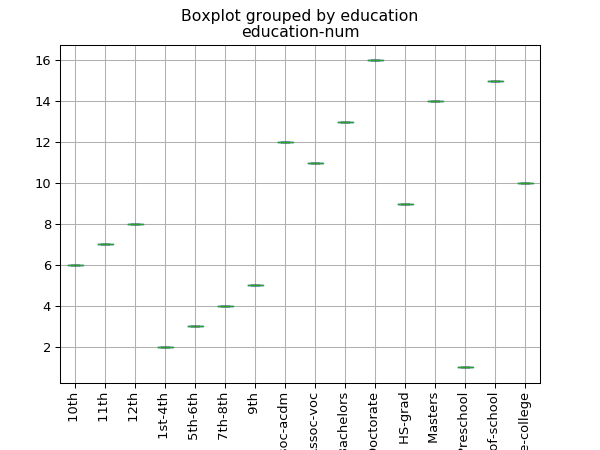

In [6]:
#write the python script for boxplots here
#use matplotlib to create a figure
fig = plt.figure()
#add a 1x1x1 subplot to the figure
axis = fig.add_subplot(111)

#create the boxplot by the variables given in the task statement
adult_data.boxplot(column='education-num', by='education', rot=90, ax = axis)

### 1c. Use ONE suitable visualisation to help determine the truth value of the following statements

__Statement 1:__ People whose native-country is United-States are more likely to earn >50K. 

__Statement 2:__ People work longer hours-per-week are more likely to earn <=50K.

__Statement 3:__ A person's hours-per-week is related to his/her occupation.


<IPython.core.display.Javascript object>


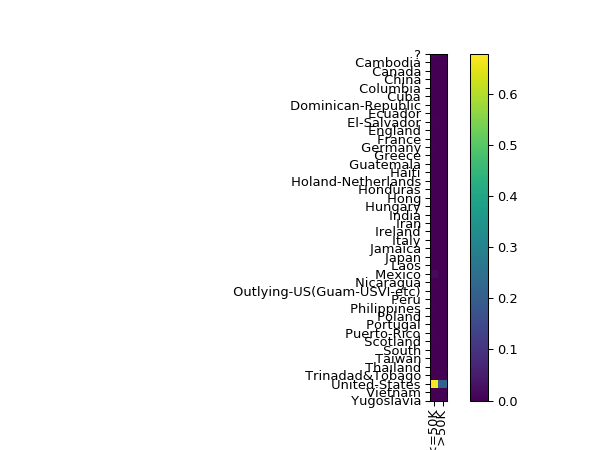

[Text(0, 0, ' ?'),
 Text(0, 0, ' Cambodia'),
 Text(0, 0, ' Canada'),
 Text(0, 0, ' China'),
 Text(0, 0, ' Columbia'),
 Text(0, 0, ' Cuba'),
 Text(0, 0, ' Dominican-Republic'),
 Text(0, 0, ' Ecuador'),
 Text(0, 0, ' El-Salvador'),
 Text(0, 0, ' England'),
 Text(0, 0, ' France'),
 Text(0, 0, ' Germany'),
 Text(0, 0, ' Greece'),
 Text(0, 0, ' Guatemala'),
 Text(0, 0, ' Haiti'),
 Text(0, 0, ' Holand-Netherlands'),
 Text(0, 0, ' Honduras'),
 Text(0, 0, ' Hong'),
 Text(0, 0, ' Hungary'),
 Text(0, 0, ' India'),
 Text(0, 0, ' Iran'),
 Text(0, 0, ' Ireland'),
 Text(0, 0, ' Italy'),
 Text(0, 0, ' Jamaica'),
 Text(0, 0, ' Japan'),
 Text(0, 0, ' Laos'),
 Text(0, 0, ' Mexico'),
 Text(0, 0, ' Nicaragua'),
 Text(0, 0, ' Outlying-US(Guam-USVI-etc)'),
 Text(0, 0, ' Peru'),
 Text(0, 0, ' Philippines'),
 Text(0, 0, ' Poland'),
 Text(0, 0, ' Portugal'),
 Text(0, 0, ' Puerto-Rico'),
 Text(0, 0, ' Scotland'),
 Text(0, 0, ' South'),
 Text(0, 0, ' Taiwan'),
 Text(0, 0, ' Thailand'),
 Text(0, 0, ' Trinadad&Tob

In [7]:
#visualisation for statement 1
#store the cross tabulation within a dataframe
ctab = pd.crosstab(adult_data.iloc[:,13], adult_data.salary, normalize=True)
#convert the pandas dataframe to a numpy array
image = ctab.to_numpy()

#use matplotlib to create a figure
fig = plt.figure()
#add a 1x1x1 subplot to the figure
axis = fig.add_subplot(111)
#plot the numpy array on the axis of the plot
image = axis.imshow(image)
#show the colour bar
fig.colorbar(image)

#add labels to the axes
col_labels = ctab.columns.to_list()
row_labels = ctab.index.values

#set the ticks of each axis equal the row and col lables
axis.set_xticks(range(len(col_labels)))
axis.set_yticks(range(len(row_labels)))
axis.set_xticklabels(col_labels, rotation='vertical')
axis.set_yticklabels(row_labels)

<IPython.core.display.Javascript object>


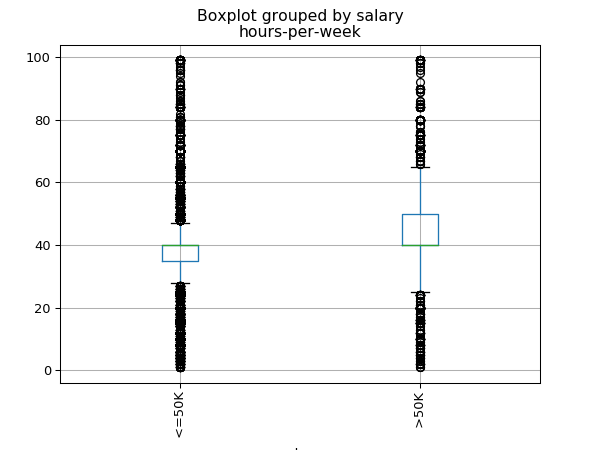

In [8]:
#visualisation for statement 2
#use matplotlib to create a figure
fig = plt.figure()
#add a 1x1x1 subplot to the figure
axis = fig.add_subplot(111)

#create the boxplot by the variables given in the task statement
adult_data.boxplot(column='hours-per-week', by='salary', rot=90, ax = axis)

<IPython.core.display.Javascript object>


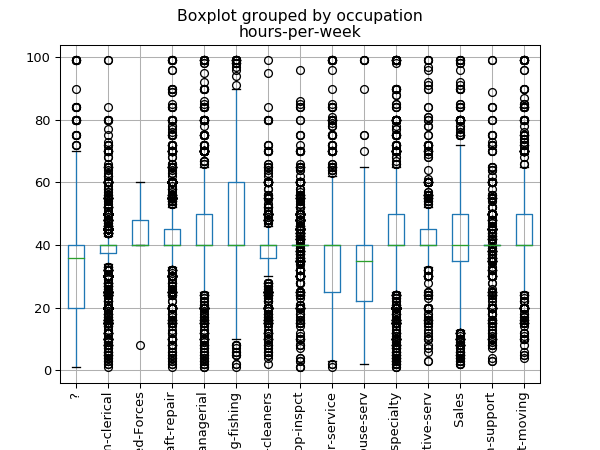

In [9]:
#visualisation for statement 3
#use matplotlib to create a figure
fig = plt.figure()
#add a 1x1x1 subplot to the figure
axis = fig.add_subplot(111)

#create the boxplot by the variables given in the task statement
adult_data.boxplot(column='hours-per-week', by='occupation', rot=90, ax = axis)

## Task 2: Visual exploration of wine quality dataset

In this task, you will use visualisation techniques to explore the wine quality dataset.

The wine quality dataset was created by Paulo Cortez et.al. see P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

The dataset consist of 12 attributes in which only the quality attribute is ordinal and the rest are contiuous.
Moreover, the dataset is divided into red and white wine. For further details: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

The main two questions for this task are:

__Question 1:__ Which combination of variables are useful for distinguishing red and white wine?

It seems that a combination of the residual sugar, free sulphur dioxide and total sulphur dioxide variables are the most useful for distinguishing red and white wines. Generally, the lower the residual sugar, free sulphur dioxide and total sulphur dioxide of a wine, the more likely it is that the wine is red. This can be derived from the below visualisations.

__Question 2:__ Which combination of variables are important for predicting the quality of a wine?

It seems that a combination of the volatile acidity and chlorides variables are the most useful for predicting the quality of a wine. Generally, the lower the volatile acidity and chlorides of a wine, the higher its quality. This can be derived from the below visualisations.

__Please note:__ you do not have to present quantitative answers to the questions. Your aim is to use visualisation to help with the exploration.

In [10]:
#data set for red wine
red_wine_data = pd.read_csv(r'C:\Users\Waqas\bdadata\wine-quality\winequality-red.csv', delimiter=';')
#data set for white wine
white_wine_data = pd.read_csv(r'C:\Users\Waqas\bdadata\wine-quality\winequality-white.csv', delimiter=';')

In [11]:
#print 10 random entries from the red_wine_data for visual inspection
red_wine_data.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1022,7.0,0.510,0.09,2.1,0.062,4.0,9.0,0.99584,3.35,0.54,10.5,5
580,12.3,0.500,0.49,2.2,0.089,5.0,14.0,1.00020,3.19,0.44,9.6,5
367,10.4,0.575,0.61,2.6,0.076,11.0,24.0,1.00000,3.16,0.69,9.0,5
1014,8.0,0.580,0.16,2.0,0.120,3.0,7.0,0.99454,3.22,0.58,11.2,6
697,7.0,0.650,0.02,2.1,0.066,8.0,25.0,0.99720,3.47,0.67,9.5,6
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,6
620,8.3,0.540,0.24,3.4,0.076,16.0,112.0,0.99760,3.27,0.61,9.4,5
1402,7.6,0.300,0.42,2.0,0.052,6.0,24.0,0.99630,3.44,0.82,11.9,6
1146,7.8,0.500,0.12,1.8,0.178,6.0,21.0,0.99600,3.28,0.87,9.8,6
231,8.0,0.380,0.06,1.8,0.078,12.0,49.0,0.99625,3.37,0.52,9.9,6


In [12]:
#print 10 random entries from the white_wine_data for visual inspection
white_wine_data.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
97,8.6,0.265,0.36,1.2,0.034,15.0,80.0,0.99130,2.95,0.36,11.4,7
146,5.6,0.160,0.27,1.4,0.044,53.0,168.0,0.99180,3.28,0.37,10.1,6
942,5.4,0.415,0.19,1.6,0.039,27.0,88.0,0.99265,3.54,0.41,10.0,7
746,7.0,0.210,0.34,8.5,0.033,31.0,253.0,0.99530,3.22,0.56,10.5,6
3352,6.7,0.360,0.28,8.3,0.034,29.0,81.0,0.99151,2.96,0.39,12.5,6
1069,6.9,0.200,0.36,1.5,0.031,38.0,147.0,0.99310,3.35,0.56,11.0,6
2258,7.6,0.480,0.28,10.4,0.049,57.0,205.0,0.99748,3.24,0.45,9.3,5
1701,7.9,0.290,0.36,11.1,0.033,43.0,208.0,0.99690,3.14,0.46,10.3,5
4774,7.1,0.240,0.34,1.2,0.045,6.0,132.0,0.99132,3.16,0.46,11.2,4
3922,6.7,0.310,0.30,2.4,0.038,30.0,83.0,0.98867,3.09,0.36,12.8,7


In [13]:
#write the script here
#N.B. you can always add more cells via the Insert menu from the menu bar.
#For clarity of presentation, it is recommended to use one cell for each visualisation you plan to present

<IPython.core.display.Javascript object>


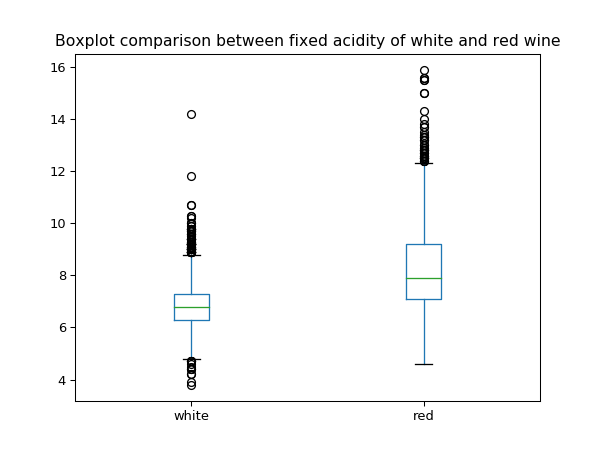

[Text(0, 0, 'white'), Text(0, 0, 'red')]

In [14]:
#use matplotlib to create a figure
fig = plt.figure()
#add a 1x1x1 subplot to the figure
axis = fig.add_subplot(111)

#create side-by-side box plots for both the white_wine_data and the red_wine_data on the same axes
white_wine_data.iloc[:,0].plot.box(positions=[1],ax=axis)
red_wine_data.iloc[:,0].plot.box(positions=[2],ax=axis)

#add tick labels and a title to the plot
plt.title('Boxplot comparison between fixed acidity of white and red wine')
axis.set_xticklabels(['white', 'red'])

<IPython.core.display.Javascript object>


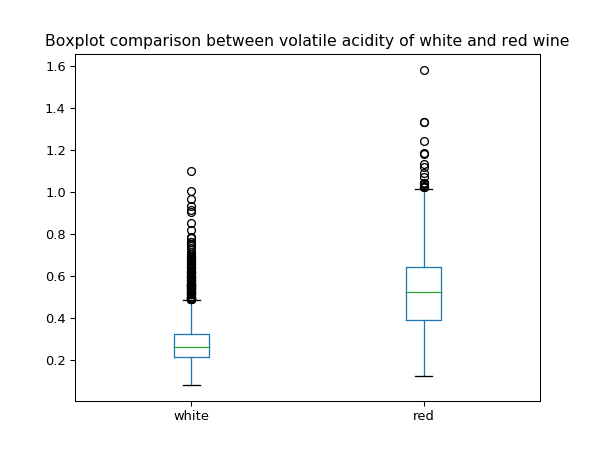

[Text(0, 0, 'white'), Text(0, 0, 'red')]

In [15]:
fig = plt.figure()
axis = fig.add_subplot(111)

white_wine_data.iloc[:,1].plot.box(positions=[1],ax=axis)
red_wine_data.iloc[:,1].plot.box(positions=[2],ax=axis)

plt.title('Boxplot comparison between volatile acidity of white and red wine')
axis.set_xticklabels(['white', 'red'])

<IPython.core.display.Javascript object>


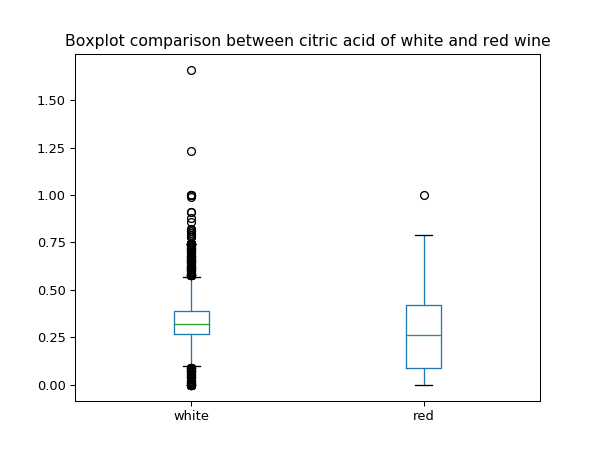

[Text(0, 0, 'white'), Text(0, 0, 'red')]

In [16]:
fig = plt.figure()
axis = fig.add_subplot(111)

white_wine_data.iloc[:,2].plot.box(positions=[1],ax=axis)
red_wine_data.iloc[:,2].plot.box(positions=[2],ax=axis)

plt.title('Boxplot comparison between citric acid of white and red wine')
axis.set_xticklabels(['white', 'red'])

<IPython.core.display.Javascript object>


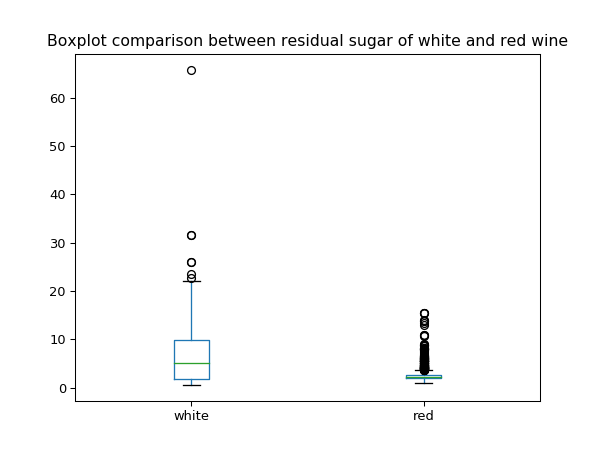

[Text(0, 0, 'white'), Text(0, 0, 'red')]

In [17]:
fig = plt.figure()
axis = fig.add_subplot(111)

white_wine_data.iloc[:,3].plot.box(positions=[1],ax=axis)
red_wine_data.iloc[:,3].plot.box(positions=[2],ax=axis)

plt.title('Boxplot comparison between residual sugar of white and red wine')
axis.set_xticklabels(['white', 'red'])

<IPython.core.display.Javascript object>


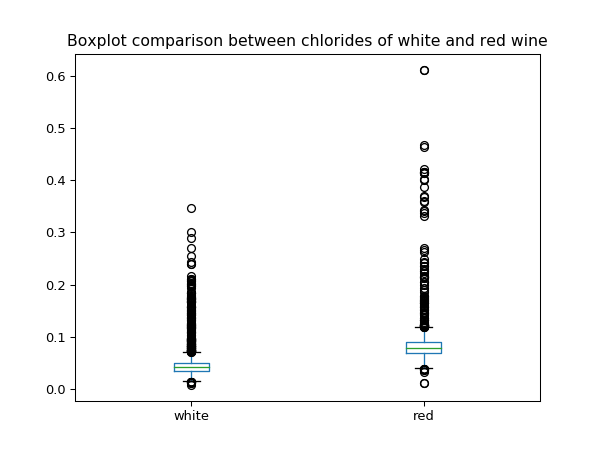

[Text(0, 0, 'white'), Text(0, 0, 'red')]

In [18]:
fig = plt.figure()
axis = fig.add_subplot(111)

white_wine_data.iloc[:,4].plot.box(positions=[1],ax=axis)
red_wine_data.iloc[:,4].plot.box(positions=[2],ax=axis)

plt.title('Boxplot comparison between chlorides of white and red wine')
axis.set_xticklabels(['white', 'red'])

<IPython.core.display.Javascript object>


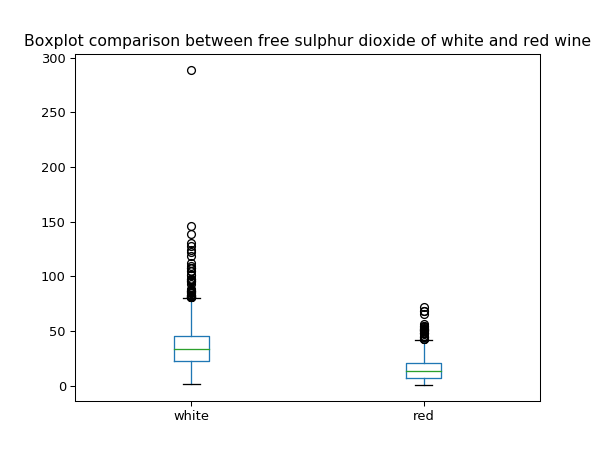

[Text(0, 0, 'white'), Text(0, 0, 'red')]

In [19]:
fig = plt.figure()
axis = fig.add_subplot(111)

white_wine_data.iloc[:,5].plot.box(positions=[1],ax=axis)
red_wine_data.iloc[:,5].plot.box(positions=[2],ax=axis)

plt.title('Boxplot comparison between free sulphur dioxide of white and red wine')
axis.set_xticklabels(['white', 'red'])

<IPython.core.display.Javascript object>


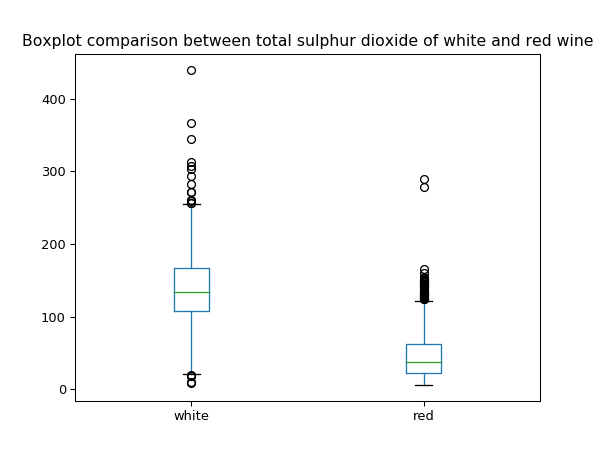

[Text(0, 0, 'white'), Text(0, 0, 'red')]

In [20]:
fig = plt.figure()
axis = fig.add_subplot(111)

white_wine_data.iloc[:,6].plot.box(positions=[1],ax=axis)
red_wine_data.iloc[:,6].plot.box(positions=[2],ax=axis)

plt.title('Boxplot comparison between total sulphur dioxide of white and red wine')
axis.set_xticklabels(['white', 'red'])

<IPython.core.display.Javascript object>


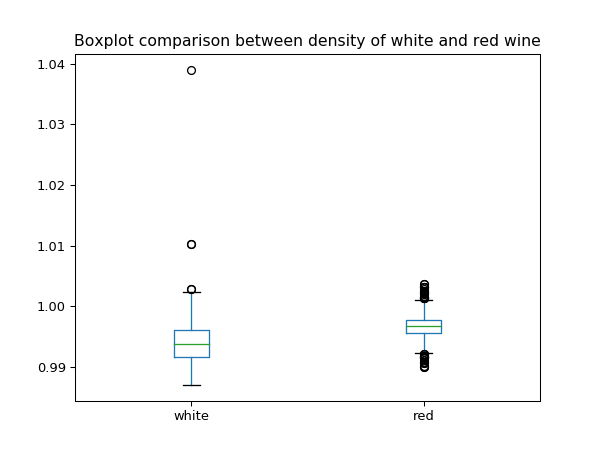

[Text(0, 0, 'white'), Text(0, 0, 'red')]

In [21]:
fig = plt.figure()
axis = fig.add_subplot(111)

white_wine_data.iloc[:,7].plot.box(positions=[1],ax=axis)
red_wine_data.iloc[:,7].plot.box(positions=[2],ax=axis)

plt.title('Boxplot comparison between density of white and red wine')
axis.set_xticklabels(['white', 'red'])

<IPython.core.display.Javascript object>


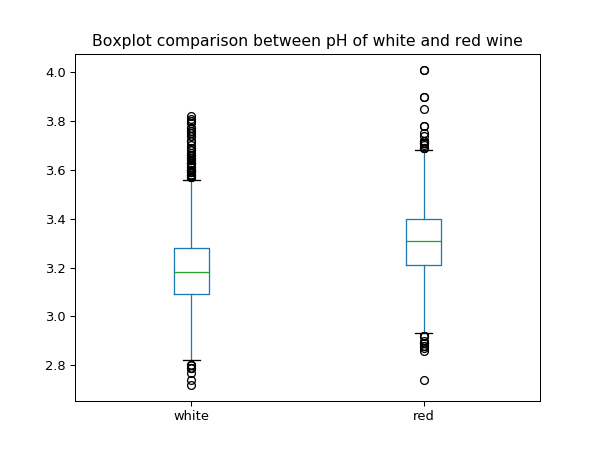

[Text(0, 0, 'white'), Text(0, 0, 'red')]

In [22]:
fig = plt.figure()
axis = fig.add_subplot(111)

white_wine_data.iloc[:,8].plot.box(positions=[1],ax=axis)
red_wine_data.iloc[:,8].plot.box(positions=[2],ax=axis)

plt.title('Boxplot comparison between pH of white and red wine')
axis.set_xticklabels(['white', 'red'])

<IPython.core.display.Javascript object>


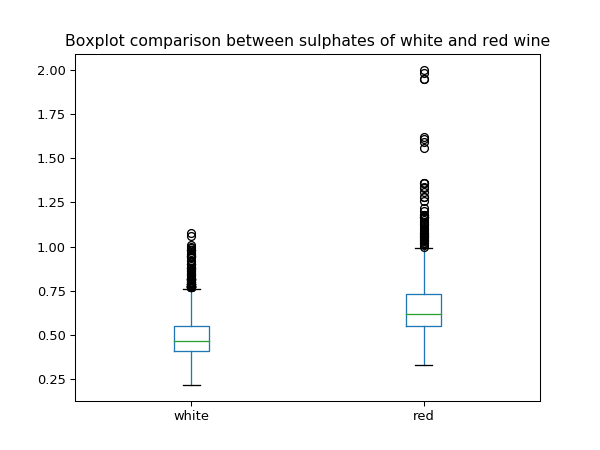

[Text(0, 0, 'white'), Text(0, 0, 'red')]

In [23]:
fig = plt.figure()
axis = fig.add_subplot(111)

white_wine_data.iloc[:,9].plot.box(positions=[1],ax=axis)
red_wine_data.iloc[:,9].plot.box(positions=[2],ax=axis)

plt.title('Boxplot comparison between sulphates of white and red wine')
axis.set_xticklabels(['white', 'red'])

<IPython.core.display.Javascript object>


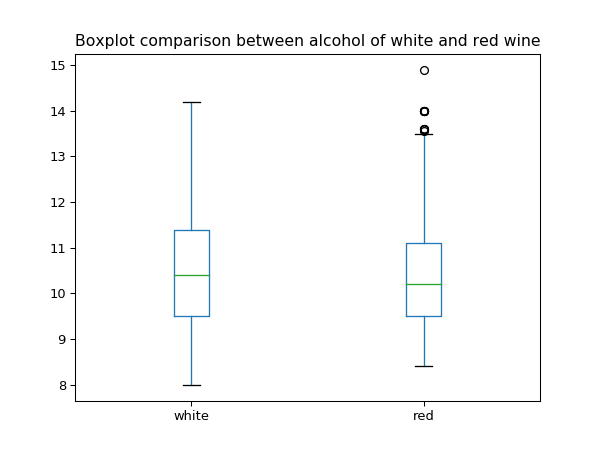

[Text(0, 0, 'white'), Text(0, 0, 'red')]

In [24]:
fig = plt.figure()
axis = fig.add_subplot(111)

white_wine_data.iloc[:,10].plot.box(positions=[1],ax=axis)
red_wine_data.iloc[:,10].plot.box(positions=[2],ax=axis)

plt.title('Boxplot comparison between alcohol of white and red wine')
axis.set_xticklabels(['white', 'red'])

<IPython.core.display.Javascript object>


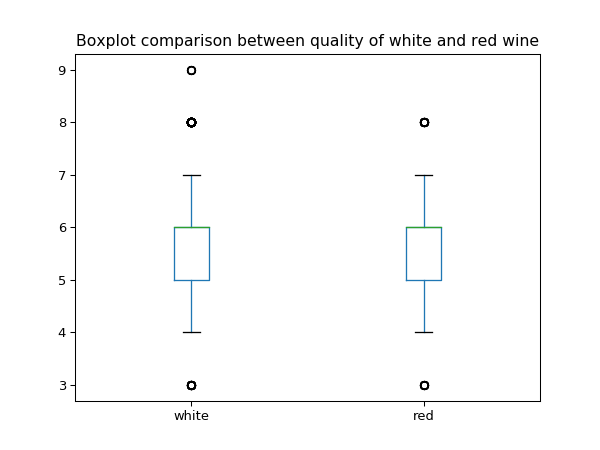

[Text(0, 0, 'white'), Text(0, 0, 'red')]

In [25]:
fig = plt.figure()
axis = fig.add_subplot(111)

white_wine_data.iloc[:,11].plot.box(positions=[1],ax=axis)
red_wine_data.iloc[:,11].plot.box(positions=[2],ax=axis)

plt.title('Boxplot comparison between quality of white and red wine')
axis.set_xticklabels(['white', 'red'])

<IPython.core.display.Javascript object>


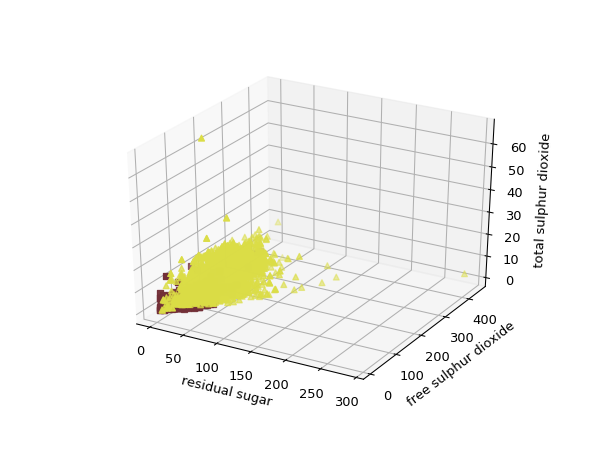

Text(0.5, 0, 'total sulphur dioxide')

In [26]:
# The three most useful attributes derived from the inspection of the prior visualisations in distingushing
# between red and white wine are:
#
# - residual sugar
# - free sulphur dioxide
# - total sulphur dioxide

#use matplotlib to create a figure
fig = plt.figure()
#add a 1x1x1 subplot to the figure
#projection='3d' dentoes the axis created will be for 3D plotting
axis = fig.add_subplot(111, projection='3d')

#create a 3D scatter plot on the axis for the selected attributes of the white_wine_data
#the marker style and colour for the white_wine_data is specified here
axis.scatter(white_wine_data.iloc[:,5], white_wine_data.iloc[:,6], white_wine_data.iloc[:,3], marker='^', color='#dbdd46')

#create a 3D scatter plot on the axis for the selected attributes of the red_wine_data
#the marker style and colour for the red_wine_data is specified here
axis.scatter(red_wine_data.iloc[:,5], red_wine_data.iloc[:,6], red_wine_data.iloc[:,3], marker='s', color='#722f37')

#set the labels for the x,y and z axes
axis.set_xlabel('residual sugar')
axis.set_ylabel('free sulphur dioxide')
axis.set_zlabel('total sulphur dioxide')

<IPython.core.display.Javascript object>


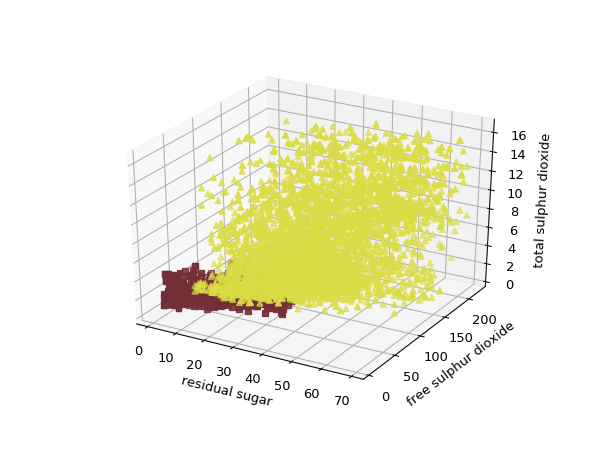

Text(0.5, 0, 'total sulphur dioxide')

In [27]:
# The three most useful attributes derived from the inspection of the prior visualisations in distingushing
# between red and white wine are:
#
# - residual sugar
# - free sulphur dioxide
# - total sulphur dioxide

# This 3D scatter graph plot plots only the values that lay within 2 stds of the mean for each of the three
# selected attributes for ease of viewing

#import the stats library from scipy
from scipy import stats

#use matplotlib to create a figure
fig = plt.figure()
#add a 1x1x1 subplot to the figure
#projection='3d' dentoes the axis created will be for 3D plotting
axis = fig.add_subplot(111, projection='3d')

#create a new dataframe called white_wine_data_sd which only stores the values in white_wine_data
#that fall within 2 standard deviations of the mean for each of the 3 selected attributes
white_wine_data_sd = white_wine_data[np.abs(white_wine_data.iloc[:,5]-white_wine_data.iloc[:,5].mean()) <= (2*white_wine_data.iloc[:,5].std())]
white_wine_data_sd = white_wine_data_sd[np.abs(white_wine_data_sd.iloc[:,6]-white_wine_data_sd.iloc[:,6].mean()) <= (2*white_wine_data_sd.iloc[:,6].std())]
white_wine_data_sd = white_wine_data_sd[np.abs(white_wine_data_sd.iloc[:,3]-white_wine_data_sd.iloc[:,3].mean()) <= (2*white_wine_data_sd.iloc[:,3].std())]

#create a new dataframe called red_wine_data_sd which only stores the values in red_wine_data
#that fall within 2 standard deviations of the mean for each of the 3 selected attributes
red_wine_data_sd = red_wine_data[np.abs(red_wine_data.iloc[:,5]-red_wine_data.iloc[:,5].mean()) <= (2*red_wine_data.iloc[:,5].std())]
red_wine_data_sd = red_wine_data_sd[np.abs(red_wine_data_sd.iloc[:,6]-red_wine_data_sd.iloc[:,6].mean()) <= (2*red_wine_data_sd.iloc[:,6].std())]
red_wine_data_sd = red_wine_data_sd[np.abs(red_wine_data_sd.iloc[:,3]-red_wine_data_sd.iloc[:,3].mean()) <= (2*red_wine_data_sd.iloc[:,3].std())]

#create a 3D scatter plot on the axis for the selected attributes of the white_wine_data_sd data
#the marker style and colour for the white_wine_data_sd data is specified here
axis.scatter(white_wine_data_sd.iloc[:,5], white_wine_data_sd.iloc[:,6], white_wine_data_sd.iloc[:,3], marker='^', color='#dbdd46')

#create a 3D scatter plot on the axis for the selected attributes of the red_wine_data_sd data
#the marker style and colour for the red_wine_data_sd data is specified here
axis.scatter(red_wine_data_sd.iloc[:,5], red_wine_data_sd.iloc[:,6], red_wine_data_sd.iloc[:,3], marker='s', color='#722f37')

#set the labels for the x,y and z axes
axis.set_xlabel('residual sugar')
axis.set_ylabel('free sulphur dioxide')
axis.set_zlabel('total sulphur dioxide')

In [28]:
#data set for red wine
red_wine_data = pd.read_csv(r'C:\Users\Waqas\bdadata\wine-quality\winequality-red.csv', delimiter=';')
#data set for white wine
white_wine_data = pd.read_csv(r'C:\Users\Waqas\bdadata\wine-quality\winequality-white.csv', delimiter=';')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


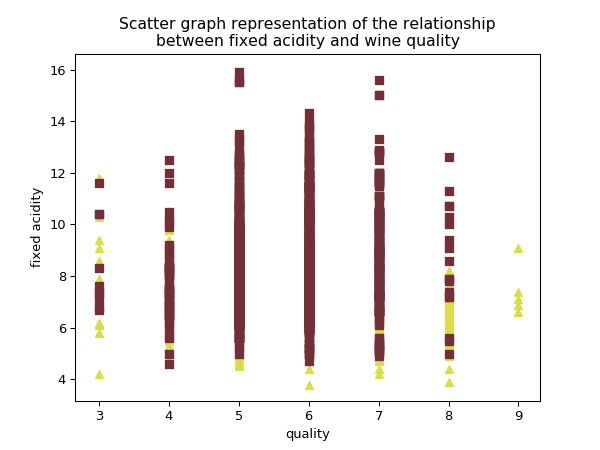

Text(0.5, 1.0, 'Scatter graph representation of the relationship\nbetween fixed acidity and wine quality')

In [29]:
#use matplotlib to create a figure
fig = plt.figure()
#add a 1x1x1 subplot to the figure
axis = fig.add_subplot(111)

#create 2D scatter plots on the axis for the selected attributes of both white_wine_data and red_wine_data
#the marker style and colour for the white_wine_data is specified here
axis.scatter(white_wine_data.iloc[:,11], white_wine_data.iloc[:,0], marker='^', color='#dbdd46')
axis.scatter(red_wine_data.iloc[:,11], red_wine_data.iloc[:,0], marker='s', color='#722f37')

#set the labels for the x and y axes and add a title to the plot
axis.set_xlabel('quality')
axis.set_ylabel('fixed acidity')

plt.title('Scatter graph representation of the relationship\nbetween fixed acidity and wine quality')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


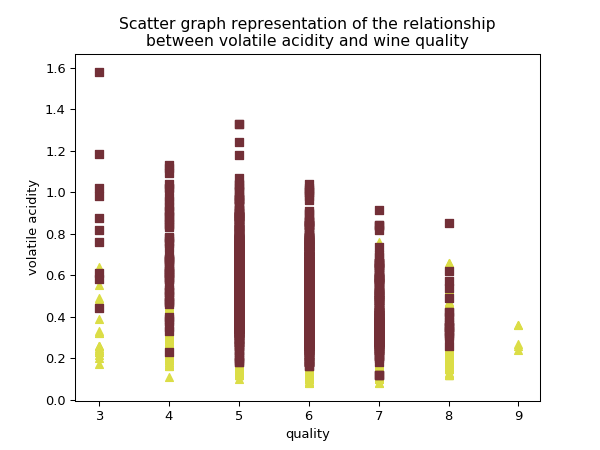

Text(0.5, 1.0, 'Scatter graph representation of the relationship\nbetween volatile acidity and wine quality')

In [30]:
fig = plt.figure()
axis = fig.add_subplot(111)

axis.scatter(white_wine_data.iloc[:,11], white_wine_data.iloc[:,1], marker='^', color='#dbdd46')
axis.scatter(red_wine_data.iloc[:,11], red_wine_data.iloc[:,1], marker='s', color='#722f37')
axis.set_xlabel('quality')
axis.set_ylabel('volatile acidity')

plt.title('Scatter graph representation of the relationship\nbetween volatile acidity and wine quality')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


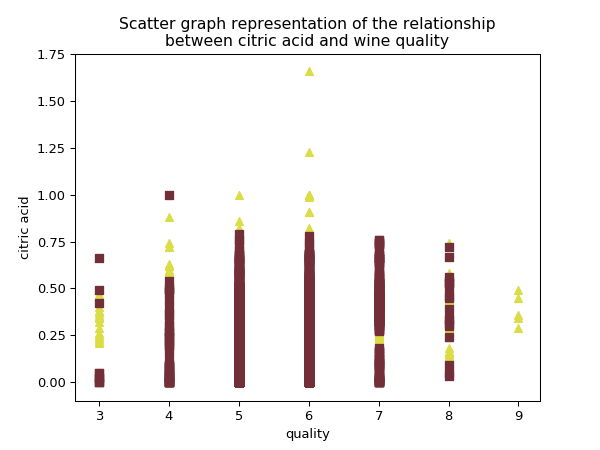

Text(0.5, 1.0, 'Scatter graph representation of the relationship\nbetween citric acid and wine quality')

In [31]:
fig = plt.figure()
axis = fig.add_subplot(111)

axis.scatter(white_wine_data.iloc[:,11], white_wine_data.iloc[:,2], marker='^', color='#dbdd46')
axis.scatter(red_wine_data.iloc[:,11], red_wine_data.iloc[:,2], marker='s', color='#722f37')
axis.set_xlabel('quality')
axis.set_ylabel('citric acid')

plt.title('Scatter graph representation of the relationship\nbetween citric acid and wine quality')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


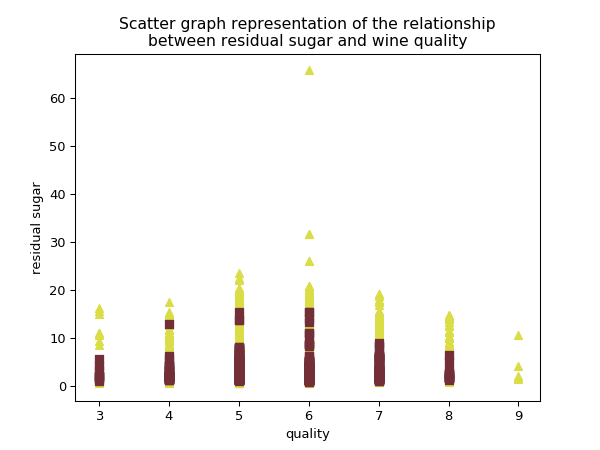

Text(0.5, 1.0, 'Scatter graph representation of the relationship\nbetween residual sugar and wine quality')

In [32]:
fig = plt.figure()
axis = fig.add_subplot(111)

axis.scatter(white_wine_data.iloc[:,11], white_wine_data.iloc[:,3], marker='^', color='#dbdd46')
axis.scatter(red_wine_data.iloc[:,11], red_wine_data.iloc[:,3], marker='s', color='#722f37')
axis.set_xlabel('quality')
axis.set_ylabel('residual sugar')

plt.title('Scatter graph representation of the relationship\nbetween residual sugar and wine quality')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


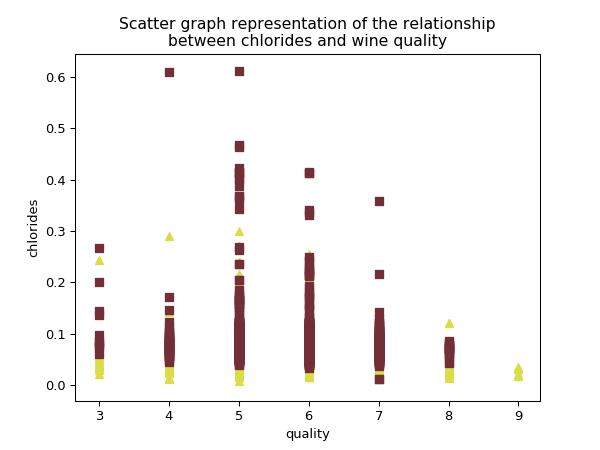

Text(0.5, 1.0, 'Scatter graph representation of the relationship\nbetween chlorides and wine quality')

In [33]:
fig = plt.figure()
axis = fig.add_subplot(111)

axis.scatter(white_wine_data.iloc[:,11], white_wine_data.iloc[:,4], marker='^', color='#dbdd46')
axis.scatter(red_wine_data.iloc[:,11], red_wine_data.iloc[:,4], marker='s', color='#722f37')
axis.set_xlabel('quality')
axis.set_ylabel('chlorides')

plt.title('Scatter graph representation of the relationship\nbetween chlorides and wine quality')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


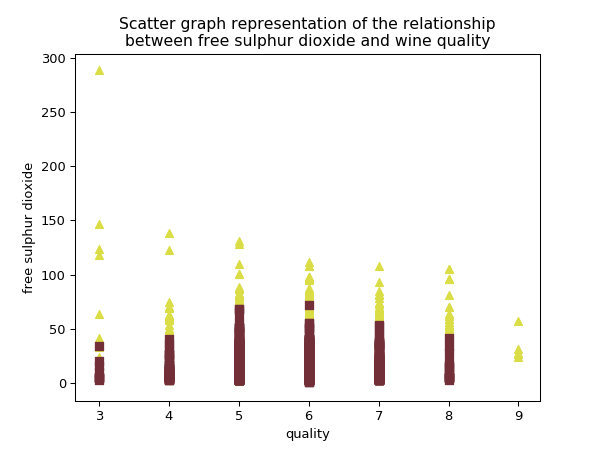

Text(0.5, 1.0, 'Scatter graph representation of the relationship\nbetween free sulphur dioxide and wine quality')

In [34]:
fig = plt.figure()
axis = fig.add_subplot(111)

axis.scatter(white_wine_data.iloc[:,11], white_wine_data.iloc[:,5], marker='^', color='#dbdd46')
axis.scatter(red_wine_data.iloc[:,11], red_wine_data.iloc[:,5], marker='s', color='#722f37')
axis.set_xlabel('quality')
axis.set_ylabel('free sulphur dioxide')

plt.title('Scatter graph representation of the relationship\nbetween free sulphur dioxide and wine quality')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


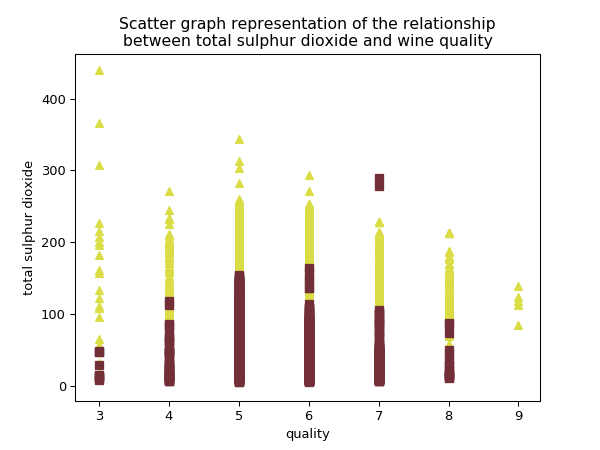

Text(0.5, 1.0, 'Scatter graph representation of the relationship\nbetween total sulphur dioxide and wine quality')

In [35]:
fig = plt.figure()
axis = fig.add_subplot(111)

axis.scatter(white_wine_data.iloc[:,11], white_wine_data.iloc[:,6], marker='^', color='#dbdd46')
axis.scatter(red_wine_data.iloc[:,11], red_wine_data.iloc[:,6], marker='s', color='#722f37')
axis.set_xlabel('quality')
axis.set_ylabel('total sulphur dioxide')

plt.title('Scatter graph representation of the relationship\nbetween total sulphur dioxide and wine quality')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


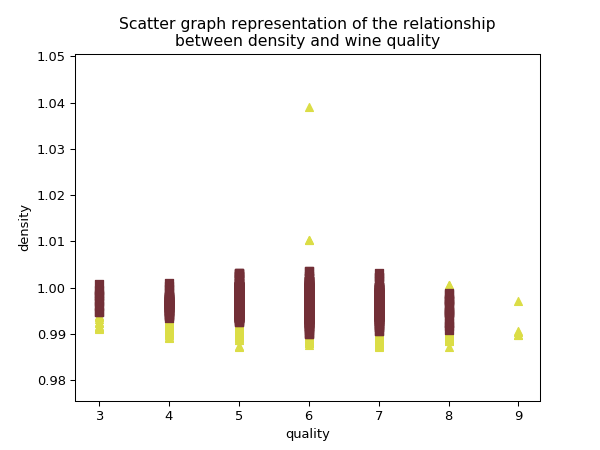

Text(0.5, 1.0, 'Scatter graph representation of the relationship\nbetween density and wine quality')

In [36]:
fig = plt.figure()
axis = fig.add_subplot(111)

axis.scatter(white_wine_data.iloc[:,11], white_wine_data.iloc[:,7], marker='^', color='#dbdd46')
axis.scatter(red_wine_data.iloc[:,11], red_wine_data.iloc[:,7], marker='s', color='#722f37')
axis.set_xlabel('quality')
axis.set_ylabel('density')

plt.title('Scatter graph representation of the relationship\nbetween density and wine quality')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


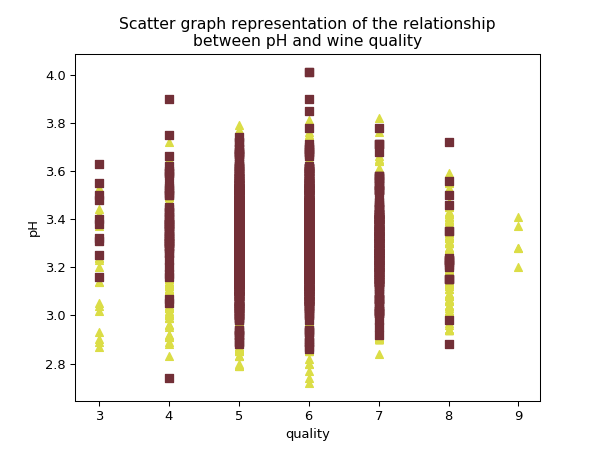

Text(0.5, 1.0, 'Scatter graph representation of the relationship\nbetween pH and wine quality')

In [37]:
fig = plt.figure()
axis = fig.add_subplot(111)

axis.scatter(white_wine_data.iloc[:,11], white_wine_data.iloc[:,8], marker='^', color='#dbdd46')
axis.scatter(red_wine_data.iloc[:,11], red_wine_data.iloc[:,8], marker='s', color='#722f37')
axis.set_xlabel('quality')
axis.set_ylabel('pH')

plt.title('Scatter graph representation of the relationship\nbetween pH and wine quality')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


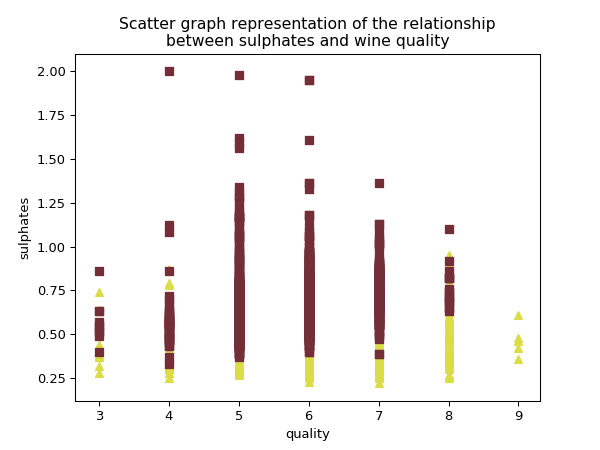

Text(0.5, 1.0, 'Scatter graph representation of the relationship\nbetween sulphates and wine quality')

In [38]:
fig = plt.figure()
axis = fig.add_subplot(111)

axis.scatter(white_wine_data.iloc[:,11], white_wine_data.iloc[:,9], marker='^', color='#dbdd46')
axis.scatter(red_wine_data.iloc[:,11], red_wine_data.iloc[:,9], marker='s', color='#722f37')
axis.set_xlabel('quality')
axis.set_ylabel('sulphates')

plt.title('Scatter graph representation of the relationship\nbetween sulphates and wine quality')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


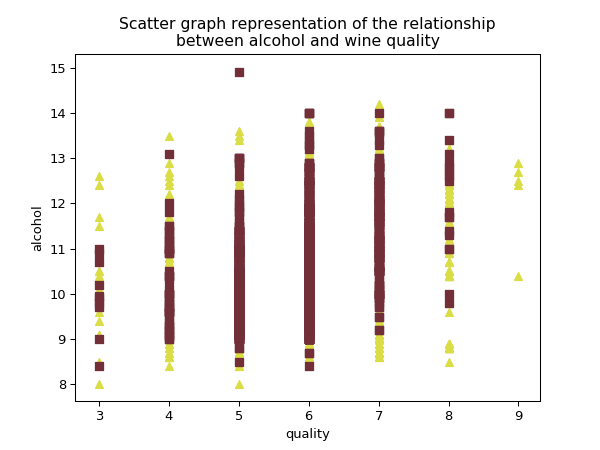

Text(0.5, 1.0, 'Scatter graph representation of the relationship\nbetween alcohol and wine quality')

In [39]:
fig = plt.figure()
axis = fig.add_subplot(111)

axis.scatter(white_wine_data.iloc[:,11], white_wine_data.iloc[:,10], marker='^', color='#dbdd46')
axis.scatter(red_wine_data.iloc[:,11], red_wine_data.iloc[:,10], marker='s', color='#722f37')
axis.set_xlabel('quality')
axis.set_ylabel('alcohol')

plt.title('Scatter graph representation of the relationship\nbetween alcohol and wine quality')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


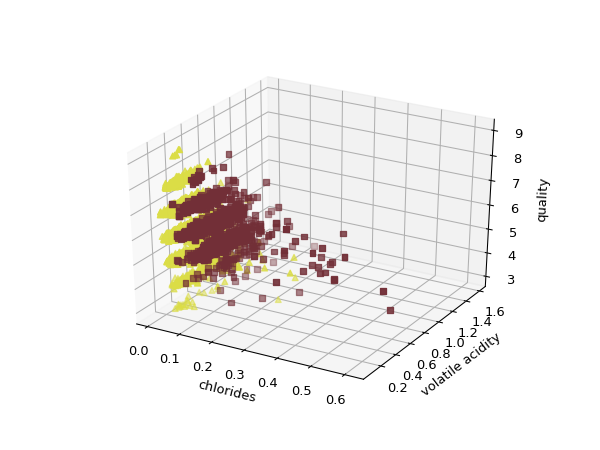

Text(0.5, 0, 'quality')

In [40]:
# The two most useful attributes derived from the inspection of the prior visualisations in predicting
# the quality of a wine are:
#
# - volatile acidity
# - chlorides

#use matplotlib to create a figure
fig = plt.figure()
#add a 1x1x1 subplot to the figure
#projection='3d' dentoes the axis created will be for 3D plotting
axis = fig.add_subplot(111, projection='3d')

#create a 3D scatter plot on the axis for the selected attributes of the white_wine_data
#the marker style and colour for the white_wine_data is specified here
axis.scatter(white_wine_data.iloc[:,4], white_wine_data.iloc[:,1], white_wine_data.iloc[:,11], marker='^', color='#dbdd46')

#create a 3D scatter plot on the axis for the selected attributes of the red_wine_data
#the marker style and colour for the red_wine_data is specified here
axis.scatter(red_wine_data.iloc[:,4], red_wine_data.iloc[:,1], red_wine_data.iloc[:,11], marker='s', color='#722f37')

#set the labels for the x,y and z axes
axis.set_xlabel('chlorides')
axis.set_ylabel('volatile acidity')
axis.set_zlabel('quality')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


<IPython.core.display.Javascript object>


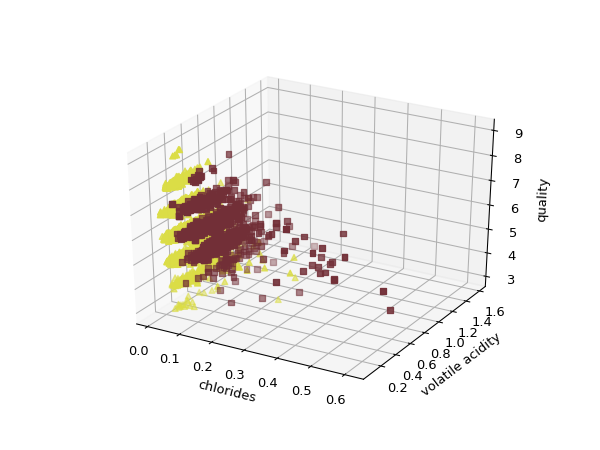

Text(0.5, 0, 'quality')

In [41]:
# The two most useful attributes derived from the inspection of the prior visualisations in predicting
# the quality of a wine are:
#
# - volatile acidity
# - chlorides

# This 3D scatter graph plot plots only the values that lay within 2 stds of the mean for each of the two
# selected attributes for ease of viewing

#use matplotlib to create a figure
fig = plt.figure()
#add a 1x1x1 subplot to the figure
#projection='3d' dentoes the axis created will be for 3D plotting
axis = fig.add_subplot(111, projection='3d')

#create a new dataframe called white_wine_data_sd which only stores the values in white_wine_data
#that fall within 2 standard deviations of the mean for each of the 2 selected attributes
white_wine_data_sd = white_wine_data[np.abs(white_wine_data.iloc[:,4]-white_wine_data.iloc[:,4].mean()) <= (2*white_wine_data.iloc[:,5].std())]
white_wine_data_sd = white_wine_data_sd[np.abs(white_wine_data_sd.iloc[:,1]-white_wine_data_sd.iloc[:,1].mean()) <= (2*white_wine_data_sd.iloc[:,6].std())]

#create a new dataframe called red_wine_data_sd which only stores the values in red_wine_data
#that fall within 2 standard deviations of the mean for each of the 2 selected attributes
red_wine_data_sd = red_wine_data_sd[np.abs(red_wine_data_sd.iloc[:,4]-red_wine_data_sd.iloc[:,4].mean()) <= (2*red_wine_data_sd.iloc[:,5].std())]
red_wine_data_sd = red_wine_data_sd[np.abs(red_wine_data_sd.iloc[:,1]-red_wine_data_sd.iloc[:,1].mean()) <= (2*red_wine_data_sd.iloc[:,6].std())]

#create a 3D scatter plot on the axis for the selected attributes of the white_wine_data_sd data
#the marker style and colour for the white_wine_data_sd data is specified here
axis.scatter(white_wine_data_sd.iloc[:,4], white_wine_data_sd.iloc[:,1], white_wine_data_sd.iloc[:,11], marker='^', color='#dbdd46')
#create a 3D scatter plot on the axis for the selected attributes of the red_wine_data_sd data
#the marker style and colour for the red_wine_data_sd data is specified here
axis.scatter(red_wine_data_sd.iloc[:,4], red_wine_data_sd.iloc[:,1], red_wine_data_sd.iloc[:,11], marker='s', color='#722f37')

#set the labels for the x,y and z axes
axis.set_xlabel('chlorides')
axis.set_ylabel('volatile acidity')
axis.set_zlabel('quality')